In [1]:
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time


from numpy import genfromtxt
from sklearn.metrics import accuracy_score, roc_curve
from sklearn.metrics import confusion_matrix, classification_report
from mpl_toolkits.mplot3d import Axes3D


from sklearn.linear_model import LogisticRegression
#----------------------------------------------Neural Net Imports
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical

# Linear stack of NN layers
from keras.models import Sequential

# Ensure Fully connected layer 
from keras.layers import Dense
#----------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



num_pixels = 28
%matplotlib inline

Using TensorFlow backend.


In [2]:
x_test = genfromtxt('Data/Testing/x_test_gr_smpl.csv', delimiter=',', skip_header =1)
print(x_test[0])

[39. 40. 39. ... 43. 45. 45.]


In [3]:
def makeContrastedDataset(dataset, upperLimitOfContrast, lowerLimitOfContrast):
    manipulationDataset = []
    for val in dataset:
        index = []
        for a in val:
            b = random.randint(lowerLimitOfContrast, upperLimitOfContrast)
            newVal = b + a
            if newVal > 255:
                newVal = 255
            if newVal < 0:
                newVal = 0
            index.append(newVal)
        manipulationDataset.append(index)
    return manipulationDataset

In [4]:
print(x_test[0])

[39. 40. 39. ... 43. 45. 45.]


In [5]:
brightx_test = makeContrastedDataset(x_test, 15, 10)

In [6]:
darkerx_test = makeContrastedDataset(x_test, -10, -15)

In [7]:
x_test[0]

array([39., 40., 39., ..., 43., 45., 45.])

In [8]:
x_train = genfromtxt('Data/Training/x_train_gr_smpl.csv', delimiter=',', skip_header =1)
y_train = genfromtxt('Data/Training/y_train_smpl.csv', delimiter=',', skip_header =1 )

In [9]:
y_test = genfromtxt('Data/Testing/y_test_smpl.csv', delimiter=',', skip_header =1 )

In [10]:
y_train = y_train.reshape(12660,1)
train_data_combined = np.append(x_train, y_train, axis=1)

y_test = y_test.reshape(4170,1)
test_data_combined = np.append(brightx_test, y_test, axis=1)
test_data_combined1 = np.append(darkerx_test, y_test, axis = 1)
np.random.seed(0)
np.random.shuffle(train_data_combined)
np.random.shuffle(test_data_combined)
np.random.shuffle(test_data_combined1)
x_train = train_data_combined[:,:-1]
y_train = train_data_combined[:, [-1]].reshape(12660,)

brightx_test = test_data_combined[:,:-1]
darkerx_test = test_data_combined1[:,:-1]
y_test = test_data_combined[:, [-1]].reshape(4170,)
# Normalisation of pixels
x_train = x_train.astype('float')/255
brightx_test  = brightx_test.astype('float')/255
darkerx_test  = darkerx_test.astype('float')/255
#  Reducing the number of attributes using opencv's reduce functionality as shown in the second python Lecture
#  As seen in python lectures: https://vision.hw.ac.uk/webapps/blackboard/content/listContent.jsp?course_id=_94419_1&content_id=_3391865_1

x_train = np.apply_along_axis(
        func1d=lambda img: cv2.resize(img.reshape((48,48)), (num_pixels,num_pixels)),
        axis =1, arr = x_train).reshape((-1,num_pixels*num_pixels))

brightx_test  = np.apply_along_axis(
        func1d=lambda img: cv2.resize(img.reshape((48,48)), (num_pixels,num_pixels)),
        axis =1, arr = brightx_test).reshape((-1,num_pixels*num_pixels))

darkerx_test  = np.apply_along_axis(
        func1d=lambda img: cv2.resize(img.reshape((48,48)), (num_pixels,num_pixels)),
        axis =1, arr = darkerx_test).reshape((-1,num_pixels*num_pixels))

In [11]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [12]:
model2 = Sequential()

In [13]:
model2.add(Dense(512, activation = 'relu',input_shape=(784,)))

# Layer 2
model2.add(Dense(512, activation = 'relu'))
# Layer 3
model2.add(Dense(512, activation = 'relu'))
# Layer 4
model2.add(Dense(512, activation = 'relu'))

#Output Layer
model2.add(Dense(10, activation = 'softmax'))

In [14]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [15]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 1,195,018
Trainable params: 1,195,018
Non-trainable params: 0
_________________________________________________________________


In [16]:
Brighter_Model = model2.fit(x_train,y_train, epochs = 20, validation_data = (brightx_test, y_test))

Train on 12660 samples, validate on 4170 samples
Epoch 1/20
12660/12660 [==============================] - 14s 1ms/step - loss: 0.8636 - accuracy: 0.7021 - val_loss: 0.6333 - val_accuracy: 0.7691
Epoch 2/20
12660/12660 [==============================] - 13s 1ms/step - loss: 0.3822 - accuracy: 0.8606 - val_loss: 0.6952 - val_accuracy: 0.7844
Epoch 3/20
12660/12660 [==============================] - 14s 1ms/step - loss: 0.2760 - accuracy: 0.8995 - val_loss: 0.6155 - val_accuracy: 0.7983
Epoch 4/20
12660/12660 [==============================] - 14s 1ms/step - loss: 0.2422 - accuracy: 0.9102 - val_loss: 0.4767 - val_accuracy: 0.8477
Epoch 5/20
12660/12660 [==============================] - 14s 1ms/step - loss: 0.1971 - accuracy: 0.9299 - val_loss: 0.4374 - val_accuracy: 0.8765
Epoch 6/20
12660/12660 [==============================] - 14s 1ms/step - loss: 0.1749 - accuracy: 0.9403 - val_loss: 0.3982 - val_accuracy: 0.8950
Epoch 7/20
12660/12660 [==============================] - 14s 1ms/ste

Text(0, 0.5, 'Accuracy')

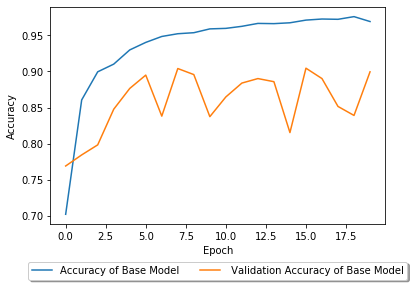

In [17]:
plt.plot(Brighter_Model.history['accuracy'], label='Accuracy of Base Model')
plt.plot(Brighter_Model.history['val_accuracy'], label=' Validation Accuracy of Base Model')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

In [18]:
model3 = Sequential()

In [19]:
model3.add(Dense(512, activation = 'relu',input_shape=(784,)))

# Layer 2
model3.add(Dense(512, activation = 'relu'))

#Output Layer
model3.add(Dense(10, activation = 'softmax'))

In [20]:
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [21]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [22]:
Darker_Model = model3.fit(x_train,y_train, epochs = 20, validation_data = (darkerx_test, y_test))

Train on 12660 samples, validate on 4170 samples
Epoch 1/20
12660/12660 [==============================] - 9s 675us/step - loss: 0.8167 - accuracy: 0.7453 - val_loss: 8.8357 - val_accuracy: 0.1496
Epoch 2/20
12660/12660 [==============================] - 8s 599us/step - loss: 0.4149 - accuracy: 0.8661 - val_loss: 11.2572 - val_accuracy: 0.1448
Epoch 3/20
12660/12660 [==============================] - 8s 621us/step - loss: 0.2748 - accuracy: 0.9096 - val_loss: 13.6622 - val_accuracy: 0.1439
Epoch 4/20
12660/12660 [==============================] - 7s 591us/step - loss: 0.2445 - accuracy: 0.9201 - val_loss: 14.5988 - val_accuracy: 0.1429
Epoch 5/20
12660/12660 [==============================] - 8s 666us/step - loss: 0.1976 - accuracy: 0.9356 - val_loss: 15.6340 - val_accuracy: 0.1386
Epoch 6/20
12660/12660 [==============================] - 8s 658us/step - loss: 0.1569 - accuracy: 0.9491 - val_loss: 17.3173 - val_accuracy: 0.1379
Epoch 7/20
12660/12660 [==============================] - 

Text(0, 0.5, 'Accuracy')

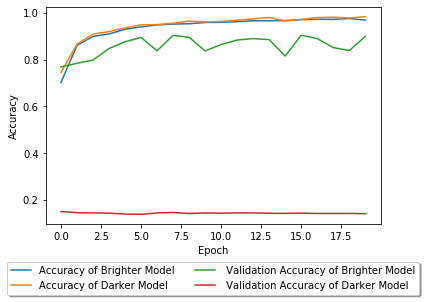

In [23]:
plt.plot(Brighter_Model.history['accuracy'], label='Accuracy of Brighter Model')
plt.plot(Darker_Model.history['accuracy'], label='Accuracy of Darker Model')
plt.plot(Brighter_Model.history['val_accuracy'], label=' Validation Accuracy of Brighter Model')
plt.plot(Darker_Model.history['val_accuracy'], label=' Validation Accuracy of Darker Model')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Adding Dropout to reduce Overfitting

In [24]:
from keras.layers import Dropout

In [25]:
model4 = Sequential()

In [26]:
model4.add(Dense(512, activation = 'relu',input_shape=(784,)))
model4.add(Dropout(0.2))
# Layer 2
model4.add(Dense(512, activation = 'relu'))
model4.add(Dropout(0.2))
# Layer 3
model4.add(Dense(512, activation = 'relu'))
model4.add(Dropout(0.2))
# Layer 4
model4.add(Dense(512, activation = 'relu'))
model4.add(Dropout(0.2))
#Output Layer
model4.add(Dense(10, activation = 'softmax'))

In [27]:
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [28]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)              

In [29]:
NoOverFit = model4.fit(x_train,y_train, epochs = 20, validation_data = (brightx_test, y_test))

Train on 12660 samples, validate on 4170 samples
Epoch 1/20
12660/12660 [==============================] - 17s 1ms/step - loss: 1.0733 - accuracy: 0.6264 - val_loss: 0.6608 - val_accuracy: 0.7542
Epoch 2/20
12660/12660 [==============================] - 15s 1ms/step - loss: 0.5124 - accuracy: 0.8130 - val_loss: 0.5259 - val_accuracy: 0.8295
Epoch 3/20
12660/12660 [==============================] - 16s 1ms/step - loss: 0.4211 - accuracy: 0.8462 - val_loss: 0.4750 - val_accuracy: 0.8235
Epoch 4/20
12660/12660 [==============================] - 15s 1ms/step - loss: 0.3499 - accuracy: 0.8725 - val_loss: 0.5161 - val_accuracy: 0.8367
Epoch 5/20
12660/12660 [==============================] - 15s 1ms/step - loss: 0.3109 - accuracy: 0.8888 - val_loss: 0.3238 - val_accuracy: 0.8995
Epoch 6/20
12660/12660 [==============================] - 15s 1ms/step - loss: 0.2879 - accuracy: 0.8957 - val_loss: 0.3857 - val_accuracy: 0.8621
Epoch 7/20
12660/12660 [==============================] - 15s 1ms/ste

Text(0, 0.5, 'Accuracy')

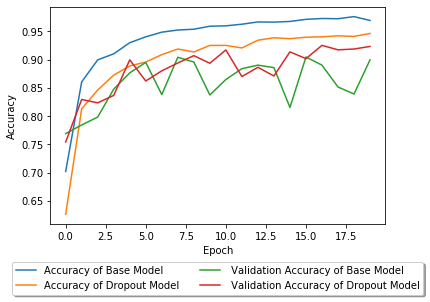

In [41]:
plt.plot(Brighter_Model.history['accuracy'], label='Accuracy of Base Model')
plt.plot(NoOverFit.history['accuracy'], label='Accuracy of Dropout Model')
plt.plot(Brighter_Model.history['val_accuracy'], label=' Validation Accuracy of Base Model')
plt.plot(NoOverFit.history['val_accuracy'], label=' Validation Accuracy of Dropout Model')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

In [31]:
x_test  = np.apply_along_axis(
        func1d=lambda img: cv2.resize(img.reshape((48,48)), (num_pixels,num_pixels)),
        axis =1, arr = x_test).reshape((-1,num_pixels*num_pixels))

In [44]:
prediction1 = model2.predict_classes(brightx_test, batch_size=10)

In [45]:
prediction2 = model4.predict_classes(brightx_test, batch_size=10)

In [46]:
rounded_labels=np.argmax(y_test, axis=1)

In [47]:
cm = confusion_matrix(rounded_labels, prediction1)

In [48]:
cm1 = confusion_matrix(rounded_labels, prediction2)

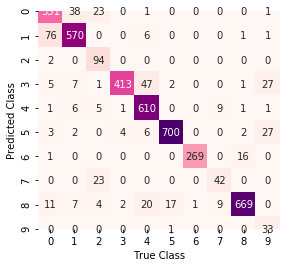

In [49]:
sns.heatmap(cm.T, square=True, annot=True,cmap="RdPu", fmt='.0f', cbar=False)
plt.xlabel('True Class')
plt.ylabel('Predicted Class');

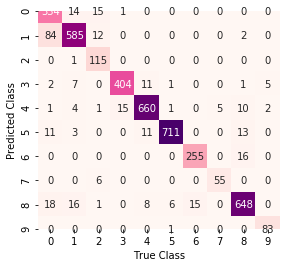

In [50]:
sns.heatmap(cm1.T, square=True, annot=True,cmap="RdPu", fmt='.0f', cbar=False)
plt.xlabel('True Class')
plt.ylabel('Predicted Class');

In [51]:
print(classification_report(rounded_labels,prediction1))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81       450
           1       0.87      0.90      0.89       630
           2       0.98      0.63      0.76       150
           3       0.82      0.98      0.89       420
           4       0.96      0.88      0.92       690
           5       0.94      0.97      0.96       720
           6       0.94      1.00      0.97       270
           7       0.65      0.70      0.67        60
           8       0.90      0.97      0.94       690
           9       0.97      0.37      0.53        90

    accuracy                           0.90      4170
   macro avg       0.89      0.82      0.83      4170
weighted avg       0.90      0.90      0.90      4170



In [52]:
print(classification_report(rounded_labels,prediction2))

              precision    recall  f1-score   support

           0       0.92      0.74      0.82       450
           1       0.86      0.93      0.89       630
           2       0.99      0.77      0.86       150
           3       0.94      0.96      0.95       420
           4       0.94      0.96      0.95       690
           5       0.95      0.99      0.97       720
           6       0.94      0.94      0.94       270
           7       0.90      0.92      0.91        60
           8       0.91      0.94      0.92       690
           9       0.99      0.92      0.95        90

    accuracy                           0.92      4170
   macro avg       0.93      0.91      0.92      4170
weighted avg       0.92      0.92      0.92      4170

